In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [11]:
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [9]:
print(f"Eğitim verilerinin sayısı ve boyutu= {x_train.shape}")
print(f"Test verilerinin sayısı ve boyutu= {x_test.shape}")

Eğitim verilerinin sayısı ve boyutu= (60000, 28, 28)
Test verilerinin sayısı ve boyutu= (10000, 28, 28)


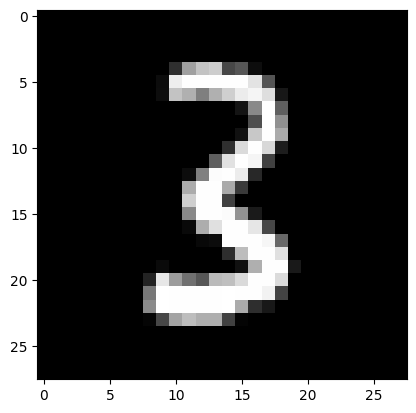

In [17]:
plt.imshow(x_train[50000],cmap="gray")

In [21]:
y_train[50000]

3

In [23]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [29]:
X_train, X_val, y_train_split, y_val=train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

In [31]:
print(f"Eğitim (Train) verilerinin son hali={X_train.shape}")
print(f"Doğrulama (Val) verilerinin son hali={X_val.shape}")

Eğitim (Train) verilerinin son hali=(48000, 28, 28)
Doğrulama (Val) verilerinin son hali=(12000, 28, 28)


In [39]:
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32,(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    
    #2
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
    
])

In [41]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [49]:
model_checkpoint=keras.callbacks.ModelCheckpoint(
    'my_cnn_model_for_MNIST_dataset_h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [57]:
print("Model Çalıştırılıyor")
history=model.fit(
    X_train, y_train_split, validation_data=(X_val, y_val),
    batch_size=128, epochs=10, callbacks=model_checkpoint, verbose=1
)

Model Çalıştırılıyor
Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.2066 - accuracy: 0.9363
Epoch 1: val_accuracy improved from -inf to 0.98550, saving model to my_cnn_model_for_MNIST_dataset_h5


INFO:tensorflow:Assets written to: my_cnn_model_for_MNIST_dataset_h5\assets


INFO:tensorflow:Assets written to: my_cnn_model_for_MNIST_dataset_h5\assets


375/375 [==============================] - 35s 91ms/step - loss: 0.2066 - accuracy: 0.9363 - val_loss: 0.0487 - val_accuracy: 0.9855
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.0667 - accuracy: 0.9786
Epoch 2: val_accuracy improved from 0.98550 to 0.98733, saving model to my_cnn_model_for_MNIST_dataset_h5


INFO:tensorflow:Assets written to: my_cnn_model_for_MNIST_dataset_h5\assets


INFO:tensorflow:Assets written to: my_cnn_model_for_MNIST_dataset_h5\assets


375/375 [==============================] - 34s 91ms/step - loss: 0.0667 - accuracy: 0.9786 - val_loss: 0.0385 - val_accuracy: 0.9873
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.0481 - accuracy: 0.9851
Epoch 3: val_accuracy improved from 0.98733 to 0.98883, saving model to my_cnn_model_for_MNIST_dataset_h5


INFO:tensorflow:Assets written to: my_cnn_model_for_MNIST_dataset_h5\assets


INFO:tensorflow:Assets written to: my_cnn_model_for_MNIST_dataset_h5\assets


375/375 [==============================] - 34s 91ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0367 - val_accuracy: 0.9888
Epoch 4/10
375/375 [==============================] - ETA: 0s - loss: 0.0399 - accuracy: 0.9868
Epoch 4: val_accuracy improved from 0.98883 to 0.99142, saving model to my_cnn_model_for_MNIST_dataset_h5


INFO:tensorflow:Assets written to: my_cnn_model_for_MNIST_dataset_h5\assets


INFO:tensorflow:Assets written to: my_cnn_model_for_MNIST_dataset_h5\assets


375/375 [==============================] - 34s 91ms/step - loss: 0.0399 - accuracy: 0.9868 - val_loss: 0.0311 - val_accuracy: 0.9914
Epoch 5/10
375/375 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9894
Epoch 5: val_accuracy did not improve from 0.99142
375/375 [==============================] - 33s 89ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0320 - val_accuracy: 0.9912
Epoch 6/10
375/375 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9907
Epoch 6: val_accuracy improved from 0.99142 to 0.99258, saving model to my_cnn_model_for_MNIST_dataset_h5


INFO:tensorflow:Assets written to: my_cnn_model_for_MNIST_dataset_h5\assets


INFO:tensorflow:Assets written to: my_cnn_model_for_MNIST_dataset_h5\assets


375/375 [==============================] - 35s 93ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0282 - val_accuracy: 0.9926
Epoch 7/10
375/375 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9914
Epoch 7: val_accuracy did not improve from 0.99258
375/375 [==============================] - 33s 88ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.0304 - val_accuracy: 0.9911
Epoch 8/10
375/375 [==============================] - ETA: 0s - loss: 0.0252 - accuracy: 0.9918
Epoch 8: val_accuracy did not improve from 0.99258
375/375 [==============================] - 33s 88ms/step - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.0338 - val_accuracy: 0.9902
Epoch 9/10
375/375 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9923
Epoch 9: val_accuracy improved from 0.99258 to 0.99267, saving model to my_cnn_model_for_MNIST_dataset_h5


INFO:tensorflow:Assets written to: my_cnn_model_for_MNIST_dataset_h5\assets


INFO:tensorflow:Assets written to: my_cnn_model_for_MNIST_dataset_h5\assets


375/375 [==============================] - 35s 93ms/step - loss: 0.0229 - accuracy: 0.9923 - val_loss: 0.0259 - val_accuracy: 0.9927
Epoch 10/10
375/375 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9928
Epoch 10: val_accuracy did not improve from 0.99267
375/375 [==============================] - 33s 89ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0325 - val_accuracy: 0.9902


In [59]:
print("Model, Test Verisi Üzrinde Değerlendiriliyor")
test_loss, test_accuracy=model.evaluate(x_test, y_test)

print(f"Test verisinin loss değeri= {test_loss}")
print(f"test verisinin accuracy değeri={test_accuracy}")

Model, Test Verisi Üzrinde Değerlendiriliyor
313/313 [==============================] - 2s 8ms/step - loss: 0.0208 - accuracy: 0.9925
Test verisinin loss değeri= 0.020795417949557304
test verisinin accuracy değeri=0.9925000071525574


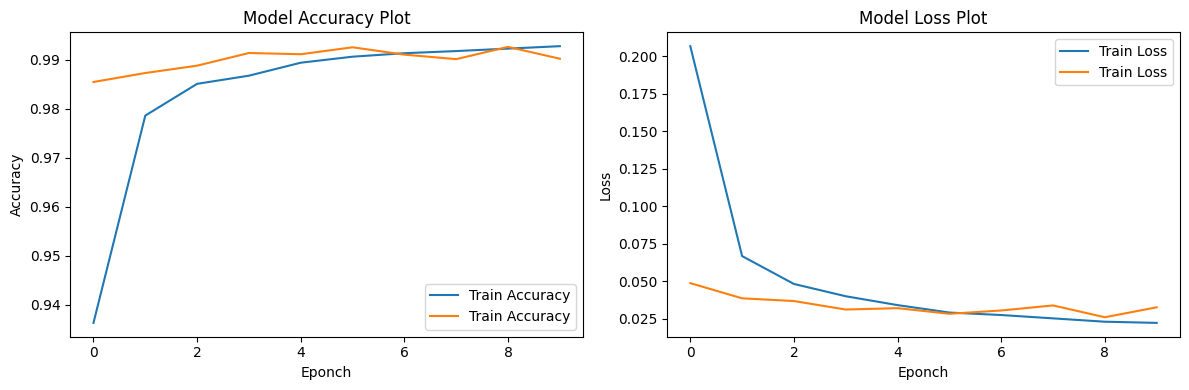

In [65]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Train Accuracy')
plt.title("Model Accuracy Plot")
plt.xlabel("Eponch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Train Loss')
plt.title("Model Loss Plot")
plt.xlabel("Eponch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [71]:
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred, axis=1)
y_test_classes=np.argmax(y_test, axis=1)

313/313 [==============================] - 3s 8ms/step


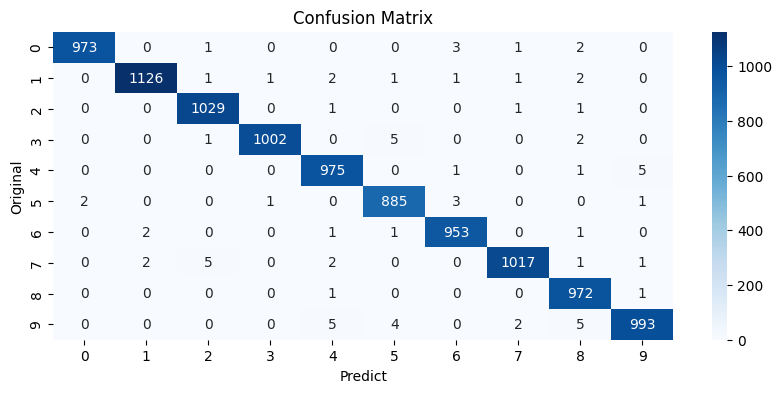

In [73]:
cm=confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10,4))
sns.heatmap(cm,annot=True, fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Original")
plt.show()
